In [1]:
import os, sys
import yaml

cwd = os.getcwd()
sys.path.append(os.path.dirname(cwd))
from utils import models_classifyer as models
from utils import preprocessing as pre
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sklearn
import seaborn as sns

models_weights = ["../weights/Model1/model1_weights.h5", "../weights/Model3/model3_weights.h5", "../weights/Model5/model5_weights.h5"]
names = ["model1", "model2", "model3"]
file = "../config/Classifier/config_classifier1.yaml"
with open(file, 'r') as file_descriptor:
    config = yaml.load(file_descriptor, Loader=yaml.FullLoader)
model_input = tf.keras.layers.Input(shape=(512,21))
model1 = models.Classifier_reg1(config['Classifier'], name = names[0])
model2 = models.Classifier_reg1(config['Classifier'], name = names[1])
model3 = models.Classifier_reg1(config['Classifier'], name = names[2])

output1 = model1(model_input)
output2 = model2(model_input)
output3 = model3(model_input)

model1.summary()

model1.load_weights("../weights/Model1/model1_weights.h5")
model2.load_weights("../weights/Model3/model3_weights.h5")
model3.load_weights("../weights/Model5/model5_weights.h5")


ensemble_output = tf.keras.layers.Average()([output1, output2, output3])
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

ensemble_model.summary()
#model.load_weights("../weights/Model1/model1_weights.h5")

Model: "classifier_reg1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           12160     
_________________________________________________________________
res_mod_pre_act_sn (ResModPr (None, 512, 64)           78144     
_________________________________________________________________
res_mod_pre_act_sn_1 (ResMod (None, 256, 64)           115136    
_________________________________________________________________
res_mod_pre_act_sn_2 (ResMod (None, 128, 64)           115136    
_________________________________________________________________
res_mod_pre_act_sn_3 (ResMod (None, 128, 128)          230016    
_________________________________________________________________
res_mod_pre_act_sn_4 (ResMod (None, 64, 128)           459648    
_________________________________________________________________
res_mod_pre_act_sn_5 (ResMod (None, 32, 128)       

In [2]:
# VAL Load data

config["Data"]["base_dir"] = "../data"
config["Data"]["train_dir"] = "Combined_data/published/Groups_5/RECORDS_REG_GLOBAL/train/*.tfrecord"
config["Data"]["val_dir"] = "Combined_data/published/Groups_5/RECORDS_REG_GLOBAL/val/*.tfrecord"

_, data_val = pre.load_data(config["Data"])
data_val = [(i[0], i[1]) for i in data_val.batch(64).as_numpy_iterator()]

In [22]:
# Make predictions 
pairs = []
for samp in data_val:
    predict1 = ensemble_model.predict(samp[0])
    pairs.append([samp[1], predict1.reshape(-1)])

arr = np.zeros(shape=((len(pairs)-1)*64 + pairs[-1][1].shape[0],2))
for i, ele in enumerate(pairs):
    if i <len(pairs):
        arr[i*64:(i+1)*64,0] = ele[0]
        arr[i*64:(i+1)*64,1] = ele[1]
    else:
        arr[i*64:,0] = ele[0]
        arr[i*64:,1] = ele[1]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
# Statistics

r = sklearn.metrics.r2_score(arr[:,0], arr[:,1])
e = sklearn.metrics.explained_variance_score(arr[:,0], arr[:,1])
mse = sklearn.metrics.mean_squared_error(arr[:,0], arr[:,1])
mdi = sklearn.metrics.median_absolute_error(arr[:,0], arr[:,1])
print("R square {}  ".format(r))
print("MSE {}".format(mse))
print("Median absolute error {}".format(mdi))
print("Explained varience {}".format(e))

R square 0.7686663621171475  
MSE 163.56084736804794
Median absolute error 6.658924102783203
Explained varience 0.7704625924998639


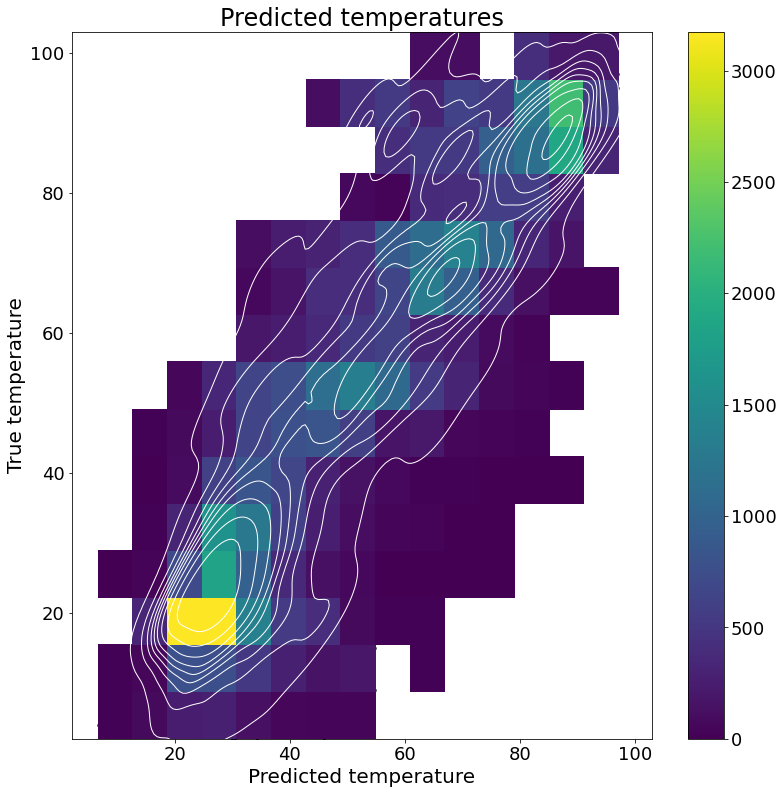

In [24]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

x, y = arr[:,1], arr[:,0]
f, ax = plt.subplots(figsize=[13, 13])
sns.scatterplot(x=x, y=y, s=5, color=".15")

sns.histplot(x=x, y=y, bins=15,cmap="viridis", cbar = True, pmax = 0.9)
sns.kdeplot(x=x, y=y, levels=10, color="w", linewidths=1)
plt.xlim([2,103])
plt.ylim([2, 103])
plt.title("Predicted temperatures")
plt.xlabel("Predicted temperature")
plt.ylabel("True temperature")
plt.savefig("img_reg.png")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 21)]    0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512, 64)      1344        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 512, 64)      36928       dense[0][0]                      
__________________________________________________________________________________________________
sequential (Sequential)         (None, 512, 64)      74240       conv1d_5[0][0]                   
______________________________________________________________________________________________

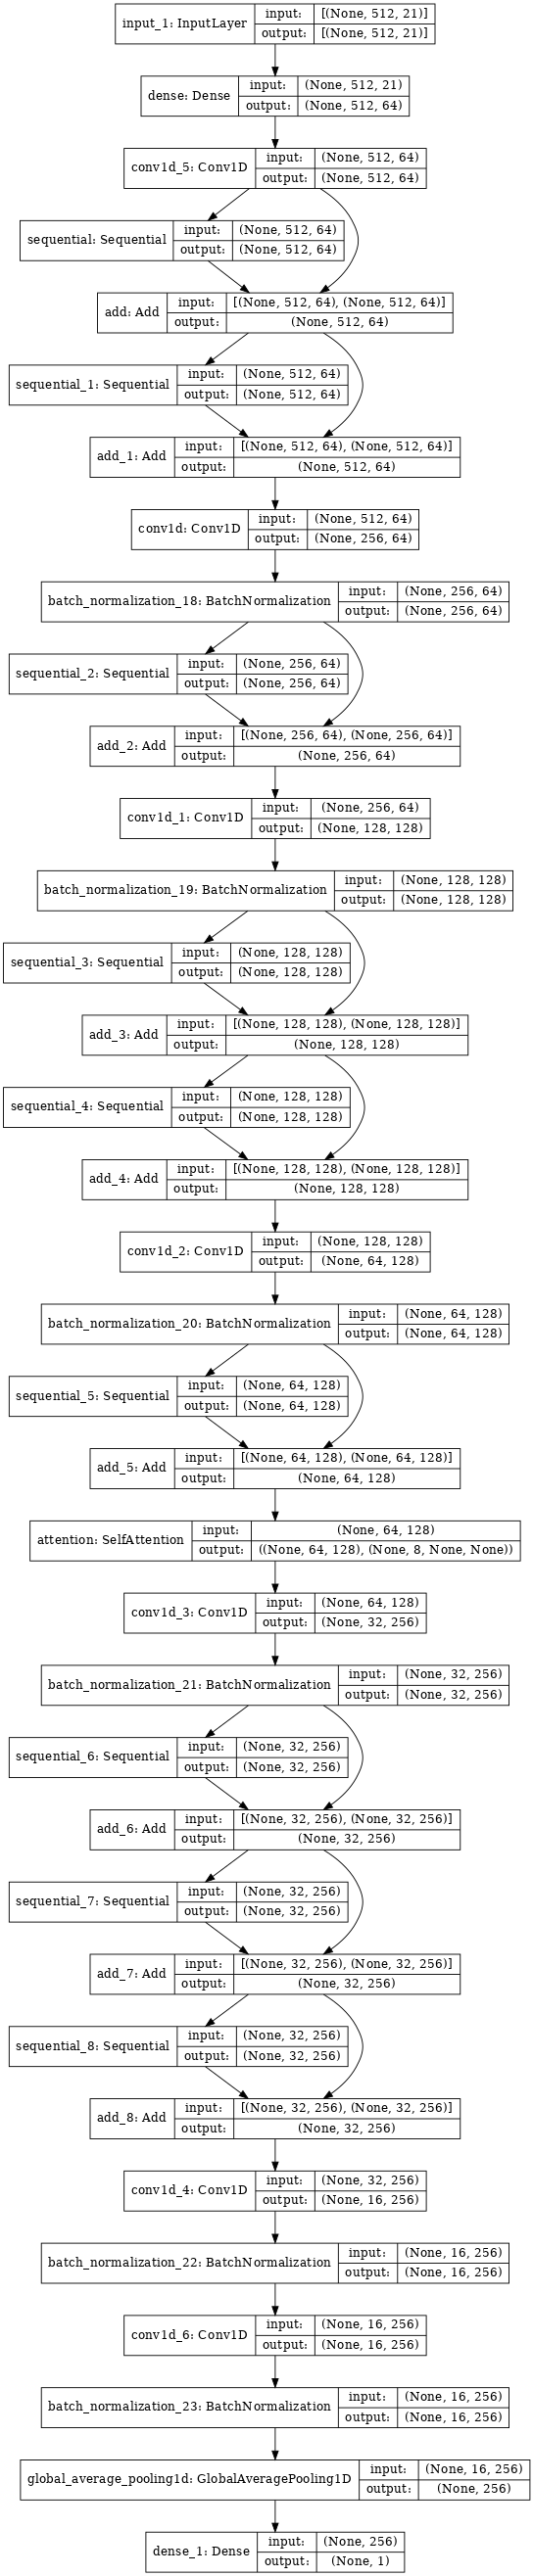

In [1]:
import os, sys
import yaml

cwd = os.getcwd()
sys.path.append(os.path.dirname(cwd))
from utils import models_classifyer as models
from utils import preprocessing as pre
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sklearn
import seaborn as sns

file = "../config/Classifier/config_classifier1.yaml"
with open(file, 'r') as file_descriptor:
    config = yaml.load(file_descriptor, Loader=yaml.FullLoader)
model = models.get_classifier(config['Classifier'], 21)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [25]:
import os, sys
import yaml

cwd = os.getcwd()
sys.path.append(os.path.dirname(cwd))
from utils import models_classifyer as models
from utils import preprocessing as pre
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sklearn
import seaborn as sns

models_weights = ["../weights/NEW_MODELS/Model1/variables/variables", "../weights/NEW_MODELS/Model2/variables/variables", "../weights/NEW_MODELS/Model3/variables/variables"]
names = ["model1", "model2", "model3"]
file = "../config/Classifier/config_classifier1.yaml"
with open(file, 'r') as file_descriptor:
    config = yaml.load(file_descriptor, Loader=yaml.FullLoader)
model_input = tf.keras.layers.Input(shape=(512,21))
model1 = models.get_classifier(config['Classifier'], 21)
model2 = models.get_classifier(config['Classifier'], 21)
model3 = models.get_classifier(config['Classifier'], 21)

output1 = model1(model_input)
output2 = model2(model_input)
output3 = model3(model_input)

model1.summary()

model1.load_weights(models_weights[0])
model2.load_weights(models_weights[1])
model3.load_weights(models_weights[2])


ensemble_output = tf.keras.layers.Average()([output1, output2, output3])
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

ensemble_model.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 512, 21)]    0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 512, 64)      1344        input_24[0][0]                   
__________________________________________________________________________________________________
conv1d_405 (Conv1D)             (None, 512, 64)      36928       dense_32[0][0]                   
__________________________________________________________________________________________________
sequential_144 (Sequential)     (None, 512, 64)      74240       conv1d_405[0][0]                 
___________________________________________________________________________________________